## Objectif
L'objectif de ce sujet d'étude est de comprendre et implémenter le modèle épidémiologique SIRD (Susceptibles, Infectés, Rétabli) avec une composante supplémentaire pour les décès. Vous utiliserez la méthode d'Euler pour résoudre numériquement le système d'équations différentielles qui décrit l'évolution de la maladie dans une population.
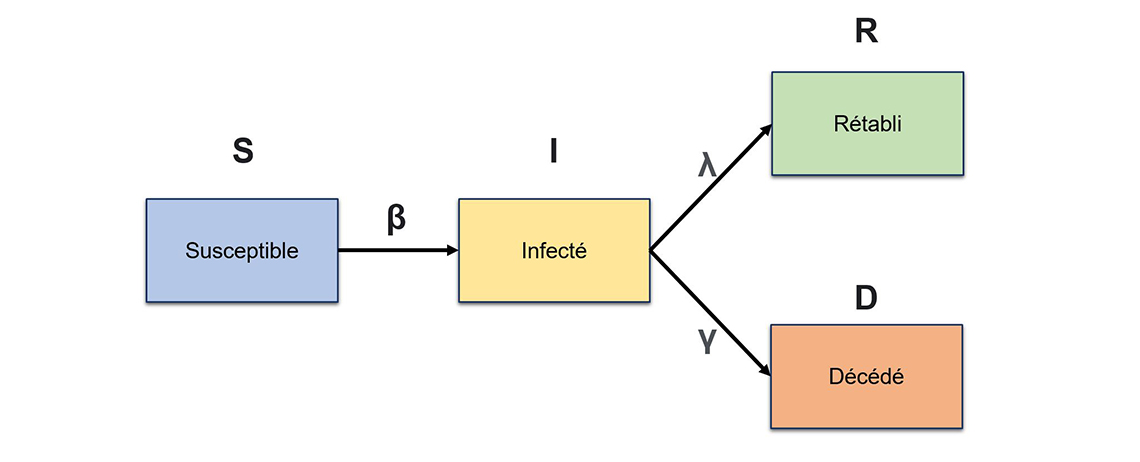


## Contexte
Le modèle SIR est un modèle mathématique utilisé en épidémiologie pour décrire la propagation d'une maladie infectieuse dans une population. Pour ce sujet, nous ajoutons une composante pour les décès (D), ce qui donne le modèle SIRD.

Les variables du modèle sont les suivantes :
- $S(t)$ : % de la population susceptibles d'être infectées à l'instant $t$
- $I(t)$ : % de la population infectées à l'instant $t$
- $R(t)$ : % de la population rétablies (et immunisées) à l'instant $t$
- $D(t)$ : % de la population décédées à l'instant $t$

Les paramètres du modèle sont :
- $\beta$ : Taux de transmission de la maladie (probabilité de transmission par contact)
- $\gamma$ : Taux de guérison (et d'immunisation)
- $\mu$ : Taux de mortalité dû à la maladie

Les équations différentielles qui décrivent le modèle SIRD sont :
- $\frac{dS}{dt} = -\beta \cdot S \cdot I$
- $\frac{dI}{dt} = \beta \cdot S \cdot I - \gamma \cdot I - \mu \cdot I$
- $\frac{dR}{dt} = \gamma \cdot I$
- $\frac{dD}{dt} = \mu \cdot I$

### Étape 1 : Implémentation de la méthode d'Euler
0. Discretiser le système d'équations différentielles
1. Écrire une fonction Python qui implémente la méthode d'Euler pour ce système d'équations différentielles. Cette fonction doit prendre en entrée :
    - Le paramétrage des équations différentielles
    - Les conditions initiales
    - Le pas de temps
    - La durée de la simulation

**Ici $t$ est en jour, donc si votre pas est égale à 0.01, il vous faut effectuer 100 pas pour simuler toute une journée**

In [5]:
import numpy as np

def euler_sird(beta, gamma, mu, step, nb_jours):

  #conditions_initiales
  time = [0]
  Susceptibles = [0.99]
  Infectés = [0.01]
  Rétablis = [0]
  Décès = [0]

  #paramétrage temps
  nb_points = int(nb_jours / step)

  #dicrétisation
  for _ in range(1, nb_points):
    new_value_time = time[-1] + step
    new_value_Susceptibles = Susceptibles[-1] * ( 1 - beta * step * Infectés[-1])
    new_value_Infectés = Infectés[-1] * ( 1 + step * (beta * Susceptibles[-1] - gamma - mu))
    new_value_Rétablis = Rétablis[-1] + gamma * step * Infectés[-1]
    new_value_Décès = Décès[-1] + mu * step * Infectés[-1]


    time.append(new_value_time)
    Susceptibles.append(new_value_Susceptibles)
    Infectés.append(new_value_Infectés)
    Rétablis.append(new_value_Rétablis)
    Décès.append(new_value_Décès)

  # si pas 0.001
  time = time[::1000]
  Susceptibles = np.array(Susceptibles[::1000])
  Infectés = np.array(Infectés[::1000])
  Rétablis = np.array(Rétablis[::1000])
  Décès = np.array(Décès[::1000])
  return time, Susceptibles, Infectés, Rétablis, Décès



### Étape 2 : Simulation et analyse
1. Effectuer une simulation pour un jeu de paramètres donné:
- $\beta$ = 0.5
- $\gamma$ = 0.15
- $\mu$ = 0.015
- $S(0)$ = 99 %
- $I(0)$ = 1 %
- $R(0)$ = 0 %
- $D(0)$ = 0 %
- un pas de temps choisi (par exemple 0.01).
- **Rappel : Ici  t  est en jour, donc si votre pas est égale à 0.01, il vous faut effectuer 100 pas pour simuler toute une journée**
2. Tracer les courbes de $S(t)$, $I(t)$, $R(t)$ et $D(t)$ en fonction du temps.

In [6]:
time, S, I, R, D = euler_sird(0.5, 0.15, 0.015, 0.001, 90)


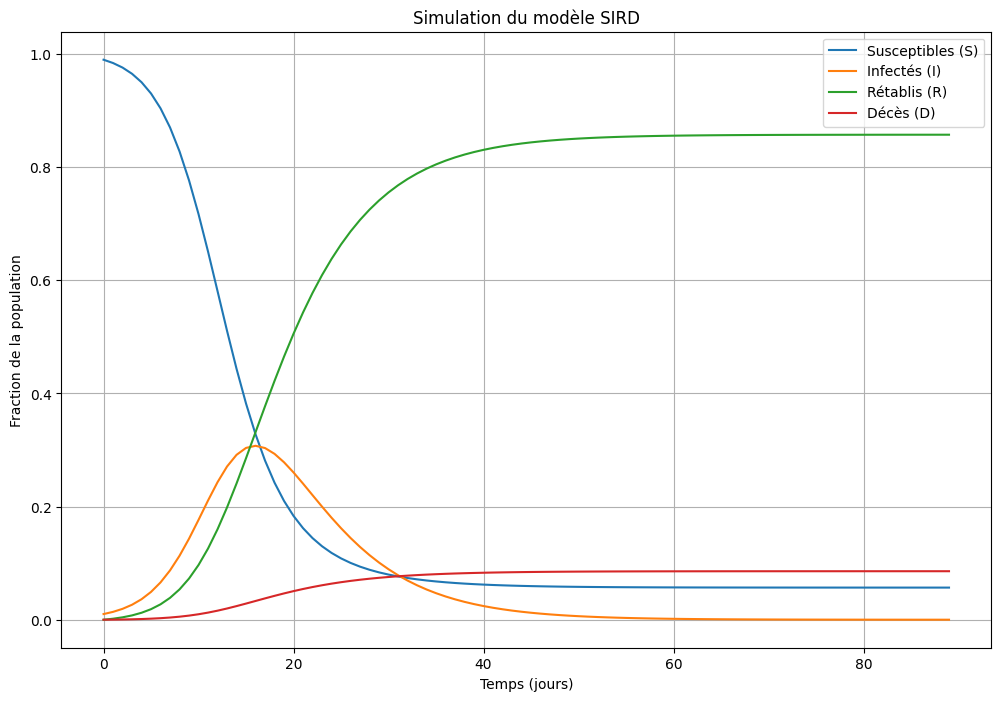

None


In [7]:
import matplotlib.pyplot as plt
def plot_data(time, Susceptibles, Infectés, Rétablis, Décès):
  plt.figure(figsize=(12, 8))
  plt.plot(time, S, label="Susceptibles (S)")
  plt.plot(time, I, label="Infectés (I)")
  plt.plot(time, R, label="Rétablis (R)")
  plt.plot(time, D, label="Décès (D)")
  plt.xlabel("Temps (jours)")
  plt.ylabel("Fraction de la population")
  plt.title("Simulation du modèle SIRD")
  plt.legend()
  plt.grid()
  plt.show()

print(plot_data(time, S, I, R, D))

## Etape 3: Ajustement des paramètres du modèle SIRD avec des données empiriques

### Objectif
L'objectif de cet exercice est de trouver les valeurs des paramètres $\beta\), \(\gamma\) et \(\mu\) qui permettent de reproduire au mieux les données générées de l'évolution de l'épidémie, en utilisant un dataset bruité.

### Instructions

1. **Lire les données du fichier `sird_dataset.csv`.**
2. **Implémenter une fonction de coût** qui mesure l'écart entre les données observées et les résultats du modèle SIRD pour un jeu de paramètres donné.(Justifiez votre choix, pourquoi un MSE au lieu d'une CCE ou inversement)
3. **Utiliser une méthode d'optimisation (Grid Search)** pour minimiser cette fonction de coût et trouver les valeurs optimales de $\beta$, $\gamma$ et $\mu$.

Voici les valeurs possible pour le triplet $\beta$, $\gamma$ et $\mu$ :
- $\beta$ varie de 0.25 à 0.5
- $\gamma$ varie de 0.08 à 0.15
- $\mu$ varie de 0.005 à 0.015

4. Visualisez sur un même graphique les résultats de votre modèle théorique optimal et les données empiriques.
**Rappel** : Ici $t$ est en jour, donc si votre pas est égale à 0.01, il vous faut effectuer 100 pas pour simuler toute une journée


In [8]:
import pandas as pd

ground_truth = pd.read_csv("sird_dataset.csv")

print(ground_truth.head())

# from google.colab import drive
# drive.mount('/content/drive')

# import pandas as pd

# file_path = '/content/drive/My Drive/sird_dataset (1).csv'
# ground_truth = pd.read_csv(file_path)

# print(ground_truth.head())

   Jour  Susceptibles  Infectés  Rétablis     Décès
0     0      0.998894  0.003197 -0.002455 -0.004622
1     1      0.991526  0.000409  0.010702  0.008857
2     2      0.982164  0.011018  0.004865 -0.001515
3     3      0.988132  0.008969 -0.006308  0.003571
4     4      0.971090  0.007307  0.005403  0.004894


In [9]:
# JUSTIFIER LE CHOIX : Nous cherchons à réduire l'écart entre des valeurs numériques continues (régression) donc il faut utiliser l'erreur quadratique moyenne MSE

# calcul mse
def mse(model_prediction, valeur_reel):

	# nb_echantillions = len(model_prediction)

	# total_squared_errors = 0
	# for index in range(nb_echantillions):
	# 	total_squared_errors += (model_prediction[index] - valeur_reel[index]) ** 2

	# return total_squared_errors / nb_echantillions

  if len(model_prediction) != len(valeur_reel):
        raise ValueError("Les listes doivent avoir la même longueur.")
  return np.mean((np.array(model_prediction) - np.array(valeur_reel)) ** 2)

In [10]:
import math
from tqdm.contrib.itertools import product

def grid_search(step, nb_jours, ground_truth):
  betas = np.linspace(0.25, 0.5, 10)
  gammas = np.linspace(0.08, 0.15, 10)
  mus = np.linspace(0.005, 0.015, 10)

  best_beta, best_gamma, best_mu = None, None, None
  best_mse = float("inf")

  for beta, gamma, mu in product(betas, gammas, mus):
    time, Susceptibles, Infectés, Rétablis, Décès = euler_sird(beta, gamma, mu, step, nb_jours)
    mse_Susceptibles = mse(Susceptibles, ground_truth["Susceptibles"].values)
    mse_Infectés = mse(Infectés, ground_truth["Infectés"].values)
    mse_Rétablis = mse(Rétablis, ground_truth["Rétablis"].values)
    mse_Décès = mse(Décès, ground_truth["Décès"].values)
    actual_mse = mse_Susceptibles + mse_Infectés + mse_Rétablis + mse_Décès
    if actual_mse < best_mse:
      best_mse = actual_mse
      best_beta, best_gamma, best_mu = beta, gamma, mu

  return best_beta, best_gamma, best_mu


c:\Users\bouss\Downloads\OneDrive\Bureau\python\projets 2024-2025\data_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 1000/1000 [02:43<00:00,  6.12it/s]


0.2777777777777778 0.08777777777777777 0.008333333333333333


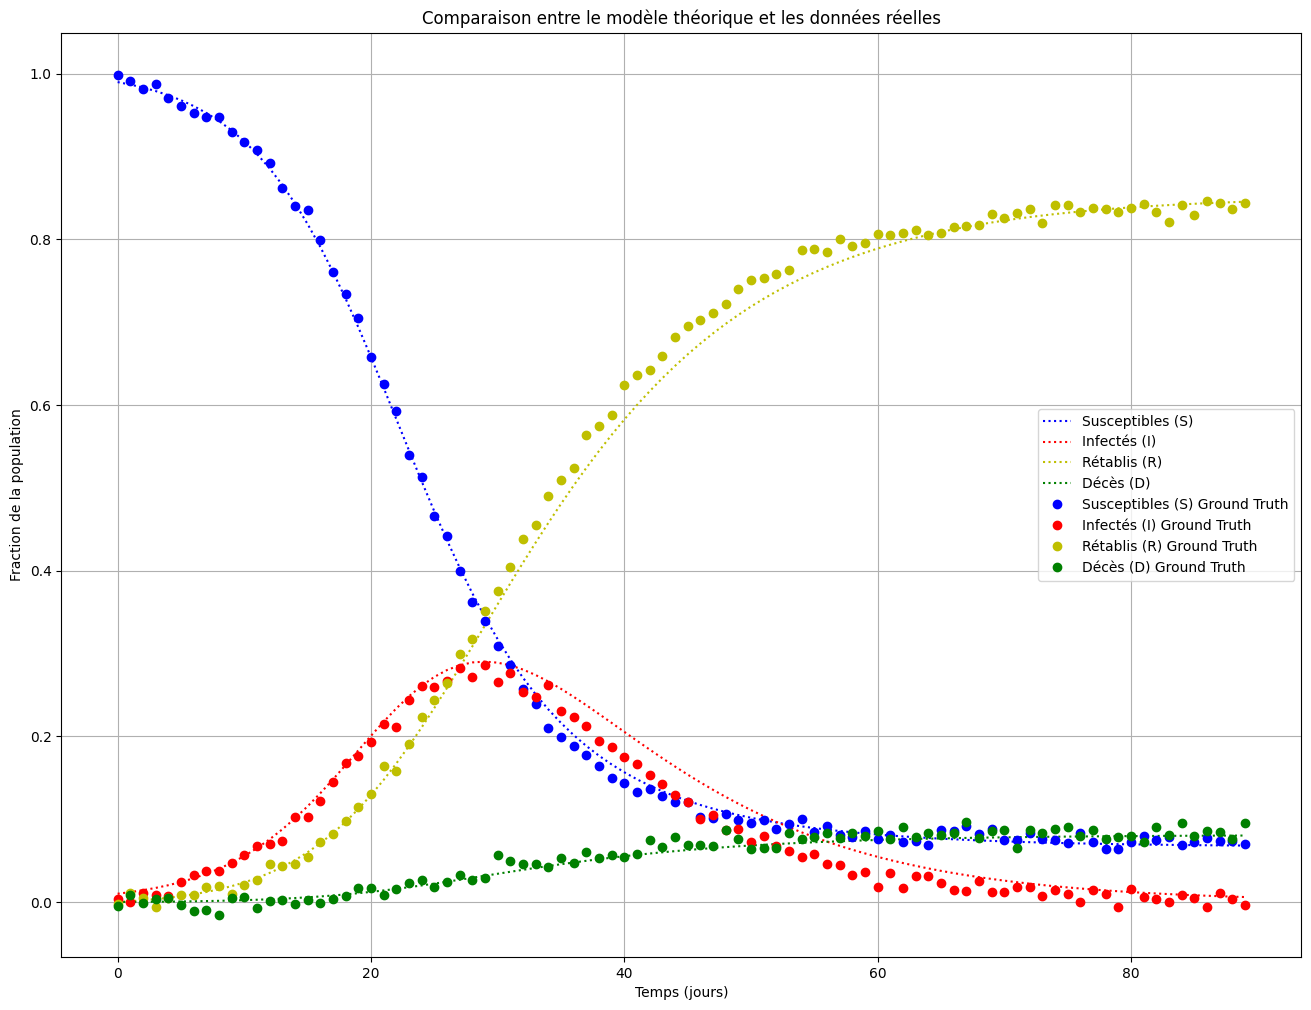

None


In [11]:
best_beta, best_gamma, best_mu = grid_search(0.001, 90, ground_truth)
print(best_beta, best_gamma, best_mu)


time, S2, I2, R2, D2 = euler_sird(best_beta, best_gamma, best_mu, 0.001, 90)


def plot_data_comparaison(time, Susceptibles, Infectés, Rétablis, Décès, ground_truth):
  plt.figure(figsize=(16, 12))
  plt.plot(time, S2, "b:", label="Susceptibles (S)")
  plt.plot(time, I2, "r:", label="Infectés (I)")
  plt.plot(time, R2, "y:", label="Rétablis (R)")
  plt.plot(time, D2, "g:", label="Décès (D)")
  plt.plot(time, ground_truth["Susceptibles"], "bo", label="Susceptibles (S) Ground Truth")
  plt.plot(time, ground_truth["Infectés"], "ro", label="Infectés (I) Ground Truth")
  plt.plot(time, ground_truth["Rétablis"], "yo", label="Rétablis (R) Ground Truth")
  plt.plot(time, ground_truth["Décès"], "go", label="Décès (D) Ground Truth")
  plt.xlabel("Temps (jours)")
  plt.ylabel("Fraction de la population")
  plt.title("Comparaison entre le modèle théorique et les données réelles")
  plt.legend()
  plt.grid()
  plt.show()

print(plot_data_comparaison(time, S2, I2, R2, D2, ground_truth))

### Étape 4 : Scénarios de contrôle
On introduit un paramètre d'observation $R_0$ (le nombre de reproduction de base) dans le contexte du modèle SIRD est :

- $\ R_0 = \frac{\beta}{\gamma + \mu} \$

1. Expliquez intuitivement ce paramètre d'observation quand $R_0<1$ et quand $R_0>1$
2. Introduire une intervention (par exemple, la réduction de $\beta$ due à des mesures de distanciation sociale) et analyser son impact sur la dynamique de l'épidémie.
3. Comparer les scénarios avec et sans intervention.

1. On peut dire que quand R0 < 1 , l'épidémie diminue car chaque personne infectée contamine moins de 1 en moyenne. Par contre quand R0 > 1 , l'épidémie se propage et le nombre d'infectés augmente.

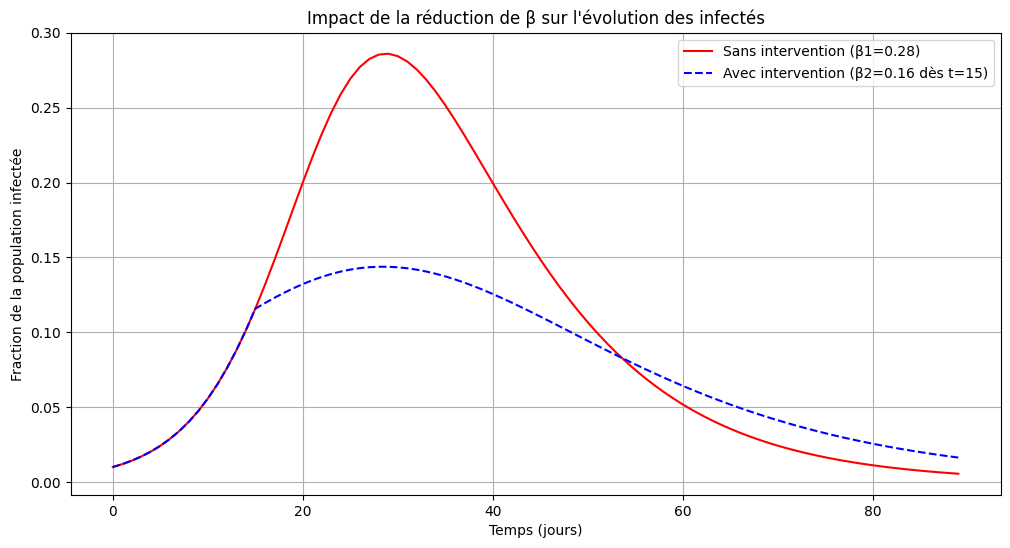

In [12]:
def euler_sird_intervention(beta, gamma, mu, step, nb_jours, intervention=None, beta_intervention=None):

    # Conditions initiaux
    time = [0]
    S, I, R, D = [0.99], [0.01], [0.0], [0.0]
    nb_points = int(nb_jours / step)

    # Boucle euler
    for _ in range(1, nb_points):
        new_time = time[-1] + step

        # réduction de β après l'intervention
        if intervention is not None and new_time >= intervention:
            beta = beta_intervention if beta_intervention is not None else beta

        # équations SIRD
        new_S = S[-1] - beta * S[-1] * I[-1] * step
        new_I = I[-1] + (beta * S[-1] * I[-1] - gamma * I[-1] - mu * I[-1]) * step
        new_R = R[-1] + gamma * I[-1] * step
        new_D = D[-1] + mu * I[-1] * step

        # Ajouter
        time.append(new_time)
        S.append(new_S)
        I.append(new_I)
        R.append(new_R)
        D.append(new_D)

    # Échantillonnage
    time = time[::1000]
    S, I, R, D = np.array(S[::1000]), np.array(I[::1000]), np.array(R[::1000]), np.array(D[::1000])

    return time, S, I, R, D


beta1 = 0.28
beta2 = 0.16
gamma = 0.09
mu = 0.008
S0, I0, R0, D0 = 0.99, 0.01, 0.0, 0.0
step = 0.001
days = 90
intervention_day = 15

# Simulation sans intervention
time_no_control, S_no_control, I_no_control, R_no_control, D_no_control = euler_sird_intervention(beta1, gamma, mu, step, days)

# Simulation avec intervention
time_control, S_control, I_control, R_control, D_control = euler_sird_intervention(beta1, gamma, mu, step, days, intervention=intervention_day, beta_intervention=beta2)

# Tracé des courbes comparatives
plt.figure(figsize=(12, 6))
plt.plot(time_no_control, I_no_control, 'r-', label="Sans intervention (β1=0.28)")
plt.plot(time_control, I_control, 'b--', label="Avec intervention (β2=0.16 dès t=15)")
plt.xlabel("Temps (jours)")
plt.ylabel("Fraction de la population infectée")
plt.title("Impact de la réduction de β sur l'évolution des infectés")
plt.legend()
plt.grid()
plt.show()

3.  La réduction de B permet de ralentir l'épidémie , le pic est plus bas et retardé.